In [2]:
library("cowplot")
suppressPackageStartupMessages(library(ggrepel))
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(tidyr))
suppressPackageStartupMessages(library(tibble))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(ggpubr))
suppressPackageStartupMessages(library(patchwork))
suppressPackageStartupMessages(library(plyr))
suppressPackageStartupMessages(library(stringr))

Warning message:
“package ‘cowplot’ was built under R version 4.3.3”
Warning message:
“package ‘dplyr’ was built under R version 4.3.3”
Warning message:
“package ‘tidyr’ was built under R version 4.3.3”
Warning message:
“package ‘tibble’ was built under R version 4.3.3”
Warning message:
“package ‘patchwork’ was built under R version 4.3.3”
Warning message:
“package ‘plyr’ was built under R version 4.3.3”
Warning message:
“package ‘stringr’ was built under R version 4.3.3”


In [3]:
df<-read.csv('01_Olink/selected_protein_OverTime.csv')

In [4]:
df <- df %>% dplyr::mutate(`Age Group` = case_when(
  cohort.cohortGuid == "BR1" ~ "Young",
  cohort.cohortGuid == "BR2" ~ "Older",
  TRUE ~ NA_character_
))
df$`Age Group`<-factor(df$`Age Group`,levels=c("Young","Older"))

In [5]:
write.csv(df %>% select(subject.subjectGuid,pbmc_sample_id,
              Assay,`Age Group`,
              sample.daysSinceFirstVisit,NPX_bridged),
          "/home//workspace/Source_Data/Extended_Fig1a.csv", 
          row.names=FALSE)

`geom_smooth()` using formula = 'y ~ x'


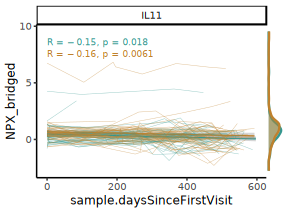

In [6]:
options(repr.plot.width = 60/25.4, repr.plot.height = 45/25.4)

max_value <- max((df %>% filter(Assay == unique(df$Assay)[1]))$NPX_bridged, na.rm = TRUE)

p1 <- ggplot(df%>% filter(Assay==unique(df$Assay)[1]),
            aes(sample.daysSinceFirstVisit, NPX_bridged,color=`Age Group`)) +
    geom_smooth(method="lm",se=TRUE, linewidth=0.3) + 
scale_color_manual(values = c("Older"='#bf812d',  "Young"='#35978f'))+
    theme_classic(base_size = 7) +
    theme(
          legend.position = "none",
          legend.title = element_blank(),
          panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
          panel.border = element_blank(),
          panel.background = element_blank(),
          strip.background = element_rect(linewidth = 0.5),
          axis.title.x = element_text(margin = margin(t = 2)))+
geom_line(aes(group = interaction(`Age Group`, subject.subjectGuid)), 
              linewidth=0.1, alpha=0.5,
              linetype =1)+facet_wrap(~Assay)+
  stat_cor(data = df %>% filter( `Age Group` == "Older")%>% filter(Assay==unique(df$Assay)[1]),
           method = "spearman",
           label.x.npc = "left",
            label.y = max_value * 1.1,
           size = 1.76, color = '#bf812d') +
  stat_cor(data = df %>% filter( `Age Group` == "Young")%>% filter(Assay==unique(df$Assay)[1]),
           method = "spearman",
           label.x.npc = "left",
           label.y = max_value * 1.25,
           size = 1.76, color = '#35978f') +
  scale_y_continuous(expand = expansion(mult = c(0.1, 0.15)))

p2 <- ggplot(df %>% filter(Assay==unique(df$Assay)[1]),aes(NPX_bridged, fill = `Age Group`, color = `Age Group`)) +
    geom_density(alpha = 0.5,linewidth=0.5) +
    scale_fill_manual(values = c("Older" = '#bf812d', "Young" = '#35978f')) +
    scale_color_manual(values = c("Older" = '#bf812d', "Young" = '#35978f')) +
    coord_flip() +
    theme_void(base_size=7) +
    theme(legend.position = "none")+ theme(plot.margin = margin(0, 0, 0, -1, "mm"))+
  scale_y_continuous(expand = expansion(mult = c(0.1, 0.15)))

# Combine the plots
combined_plot1 <- plot_grid(p1, p2, ncol = 2, rel_widths = c(10, 0.4), align = 'h', axis = 'tb')
combined_plot1


`geom_smooth()` using formula = 'y ~ x'


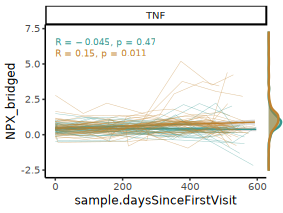

In [7]:
options(repr.plot.width = 60/25.4, repr.plot.height = 45/25.4)
max_value <- max((df %>% filter(Assay == unique(df$Assay)[2]))$NPX_bridged, na.rm = TRUE)

p1 <- ggplot(df%>% filter(Assay==unique(df$Assay)[2]),
            aes(sample.daysSinceFirstVisit, NPX_bridged,color=`Age Group`)) +
    geom_smooth(method="lm",se=TRUE, linewidth=0.3) + 
scale_color_manual(values = c("Older"='#bf812d',  "Young"='#35978f'))+
    theme_classic(base_size = 7) +
    theme(
          legend.position = "none",
          legend.title = element_blank(),
          panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
          panel.border = element_blank(),
          panel.background = element_blank(),
          strip.background = element_rect(linewidth = 0.5),
          axis.title.x = element_text(margin = margin(t = 2)))+
geom_line(aes(group = interaction(`Age Group`, subject.subjectGuid)), 
              linewidth=0.1, alpha=0.5,
              linetype =1)+facet_wrap(~Assay)+
  stat_cor(data = df %>% filter( `Age Group` == "Older")%>% filter(Assay==unique(df$Assay)[2]),
           method = "spearman",
           label.x.npc = "left",
            label.y = max_value * 1.1,
           size = 1.76, color = '#bf812d') +
  stat_cor(data = df %>% filter( `Age Group` == "Young")%>% filter(Assay==unique(df$Assay)[2]),
           method = "spearman",
           label.x.npc = "left",
           label.y = max_value * 1.25,
           size = 1.76, color = '#35978f') +
  scale_y_continuous(expand = expansion(mult = c(0.1, 0.15)))

p2 <- ggplot(df %>% filter(Assay==unique(df$Assay)[2]),aes(NPX_bridged, fill = `Age Group`, color = `Age Group`)) +
    geom_density(alpha = 0.5,linewidth=0.5) +
    scale_fill_manual(values = c("Older" = '#bf812d', "Young" = '#35978f')) +
    scale_color_manual(values = c("Older" = '#bf812d', "Young" = '#35978f')) +
    coord_flip() +
    theme_void(base_size=7) +
  scale_y_continuous(expand = expansion(mult = c(0.1, 0.15)))+
    theme(legend.position = "none")+ theme(plot.margin = margin(0, 0, 0, -1, "mm"))

# Combine the plots
combined_plot2 <- plot_grid(p1, p2, ncol = 2, rel_widths = c(10, 0.4), align = 'h', axis = 'tb')
combined_plot2

`geom_smooth()` using formula = 'y ~ x'


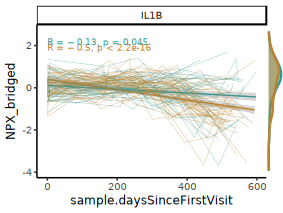

In [8]:
options(repr.plot.width = 60/25.4, repr.plot.height = 45/25.4)
max_value <- max((df %>% filter(Assay == unique(df$Assay)[3]))$NPX_bridged, na.rm = TRUE)

p1 <- ggplot(df%>% filter(Assay==unique(df$Assay)[3]),
            aes(sample.daysSinceFirstVisit, NPX_bridged,color=`Age Group`)) +
    geom_smooth(method="lm",se=TRUE, linewidth=0.3) + 
scale_color_manual(values = c("Older"='#bf812d',  "Young"='#35978f'))+
    theme_classic(base_size = 7) +
    theme(
          legend.position = "none",
          legend.title = element_blank(),
          panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
          panel.border = element_blank(),
          panel.background = element_blank(),
          strip.background = element_rect(linewidth = 0.5),
          axis.title.x = element_text(margin = margin(t = 2)))+
geom_line(aes(group = interaction(`Age Group`, subject.subjectGuid)), 
              linewidth=0.1, alpha=0.5,
              linetype =1)+facet_wrap(~Assay)+
  stat_cor(data = df %>% filter( `Age Group` == "Older")%>% filter(Assay==unique(df$Assay)[3]),
           method = "spearman",
           label.x.npc = "left",
            label.y = max_value * 1.1,
           size = 1.76, color = '#bf812d') +
  stat_cor(data = df %>% filter( `Age Group` == "Young")%>% filter(Assay==unique(df$Assay)[3]),
           method = "spearman",
           label.x.npc = "left",
           label.y = max_value * 1.25,
           size = 1.76, color = '#35978f')+
  scale_y_continuous(expand = expansion(mult = c(0.1, 0.15))) 

p2 <- ggplot(df %>% filter(Assay==unique(df$Assay)[3]),aes(NPX_bridged, fill = `Age Group`, color = `Age Group`)) +
    geom_density(alpha = 0.5,linewidth=0.5) +
    scale_fill_manual(values = c("Older" = '#bf812d', "Young" = '#35978f')) +
    scale_color_manual(values = c("Older" = '#bf812d', "Young" = '#35978f')) +
    coord_flip() +
    theme_void(base_size=7) +
  scale_y_continuous(expand = expansion(mult = c(0.1, 0.15)))+
    theme(legend.position = "none")+ theme(plot.margin = margin(0, 0, 0, -1, "mm"))

# Combine the plots
combined_plot3 <- plot_grid(p1, p2, ncol = 2, rel_widths = c(10, 0.4), align = 'h', axis = 'tb')
combined_plot3


`geom_smooth()` using formula = 'y ~ x'


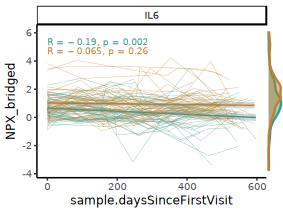

In [9]:
options(repr.plot.width = 60/25.4, repr.plot.height = 45/25.4)
max_value <- max((df %>% filter(Assay == unique(df$Assay)[4]))$NPX_bridged, na.rm = TRUE)

p1 <- ggplot(df%>% filter(Assay==unique(df$Assay)[4]),
            aes(sample.daysSinceFirstVisit, NPX_bridged,color=`Age Group`)) +
    geom_smooth(method="lm",se=TRUE, linewidth=0.3) + 
scale_color_manual(values = c("Older"='#bf812d',  "Young"='#35978f'))+
    theme_classic(base_size = 7) +
    theme(
          legend.position = "none",
          legend.title = element_blank(),
          panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
          panel.border = element_blank(),
          panel.background = element_blank(),
          strip.background = element_rect(linewidth = 0.5),
          axis.title.x = element_text(margin = margin(t = 2)))+
geom_line(aes(group = interaction(`Age Group`, subject.subjectGuid)), 
              linewidth=0.1, alpha=0.5,
              linetype =1)+facet_wrap(~Assay)+
  stat_cor(data = df %>% filter( `Age Group` == "Older")%>% filter(Assay==unique(df$Assay)[4]),
           method = "spearman",
           label.x.npc = "left",
            label.y = max_value * 1.1,
           size = 1.76, color = '#bf812d') +
  stat_cor(data = df %>% filter( `Age Group` == "Young")%>% filter(Assay==unique(df$Assay)[4]),
           method = "spearman",
           label.x.npc = "left",
           label.y = max_value * 1.25,
           size = 1.76, color = '#35978f') +
  scale_y_continuous(expand = expansion(mult = c(0.1, 0.15)))

p2 <- ggplot(df%>% filter(Assay==unique(df$Assay)[4]) ,aes(NPX_bridged, fill = `Age Group`, color = `Age Group`)) +
    geom_density(alpha = 0.5,linewidth=0.5) +
    scale_fill_manual(values = c("Older" = '#bf812d', "Young" = '#35978f')) +
    scale_color_manual(values = c("Older" = '#bf812d', "Young" = '#35978f')) +
    coord_flip() +
    theme_void(base_size=7)+
  scale_y_continuous(expand = expansion(mult = c(0.1, 0.15))) +
    theme(legend.position = "none")+ theme(plot.margin = margin(0, 0, 0, -1, "mm"))

# Combine the plots
combined_plot4 <- plot_grid(p1, p2, ncol = 2, rel_widths = c(10, 0.4), align = 'h', axis = 'tb')
combined_plot4

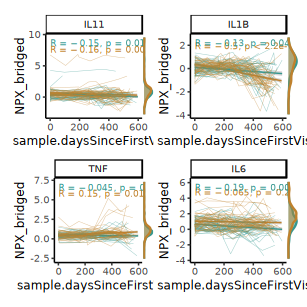

In [10]:
options(repr.plot.width = 65/25.4, repr.plot.height = 65/25.4)
p<-(combined_plot1 / combined_plot2) | (combined_plot3 / combined_plot4)
p
ggsave(filename = "FigureA.pdf", plot = p, width = 65/25.4, height = 65/25.4)